# Data extraction for deep learning earthquake detection

In this notebook, I will extract earthqaukes records from a complex file system that includes thousands subdirectories and records. Earthquakes data belogs to 2002. And there are many different channels in the directories but for my project I only need three channels so I will extract only BHE, BHN, BHZ records. Let's do it...  

## Import Libraries

In [ ]:
# Instalation ObsPy
!pip install obspy

In [ ]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import obspy
import random
import warnings

warnings.filterwarnings('ignore')

## Get data from google drive

In [ ]:
# Make a connection with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data exploration

In [ ]:
# Check out the earthquake files
main_directories = os.listdir('/content/drive/MyDrive/eartquakes_records/2002')
main_directories

['200204',
 '200205',
 '200206',
 '200207',
 '200208',
 '200209',
 '200210',
 '200211',
 '200212']

First 4 digits indicate the year 2022 while the last 2 digits months. As you can see from the above output, we have data only from April to December. First 3 months are missing. But its okay right now. Lets explore the how much data we have for each subdirectories.

In [ ]:
# Check out the first main subdirectory '200204'
os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002/{main_directories[0]}')

['20020430_120855-KIZILIRMAK-(CANKIRI).M=3.6', '20020430_234100_MAN']

In [ ]:
# Check out the second main subdirectory '200205'
os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002/{main_directories[1]}')

['20020501_104500_MAN',
 '20020501_123300_MAN',
 '20020502_111300_MAN',
 '20020503_021800_MAN',
 '20020504_232600_MAN',
 '20020505_092100_MAN',
 '20020505_093900_MAN',
 '20020505_131200_MAN',
 '20020505_175300_MAN',
 '20020506_140800_MAN',
 '20020507_233000_MAN',
 '20020508_102300_MAN',
 '20020508_195600_MAN',
 '20020509_014900_MAN',
 '20020509_145200_MAN',
 '20020509_151800_MAN',
 '20020509_151900_MAN',
 '20020509_220100_MAN',
 '20020509_220200_MAN',
 '20020511_022700_MAN',
 '20020511_073800_MAN',
 '20020511_075200_MAN',
 '20020511_094000_MAN',
 '20020511_160900_MAN',
 '20020512_233300_MAN',
 '20020513_114200_MAN',
 '20020513_124800_MAN',
 '20020513_140600_MAN',
 '20020513_152700_MAN',
 '20020513_213900_MAN',
 '20020513_214000_MAN',
 '20020514_040700_MAN',
 '20020514_081200_MAN',
 '20020514_105800_MAN',
 '20020514_193200_MAN',
 '20020514_195400_MAN',
 '20020514_211900_MAN',
 '20020514_220100_MAN',
 '20020514_224100_MAN',
 '20020515_085400_MAN',
 '20020515_153500_MAN',
 '20020516_04050

Actually, there are some information in the subdirectory file names like below:

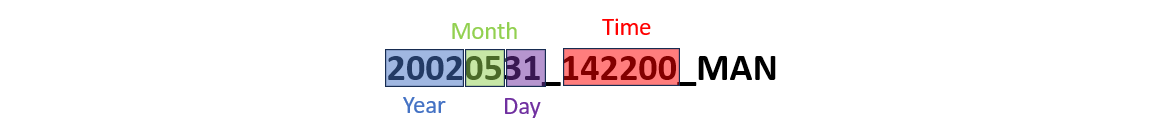

In [ ]:
# How many subdirectory I have for each main subdirectory?
for i in main_directories:
  print(f"Month: {i[-2:]},\
  Total subdirectories: {len(os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002/{i}'))}")

Month: 04,  Total subdirectories: 2
Month: 05,  Total subdirectories: 109
Month: 06,  Total subdirectories: 186
Month: 07,  Total subdirectories: 230
Month: 08,  Total subdirectories: 251
Month: 09,  Total subdirectories: 242
Month: 10,  Total subdirectories: 352
Month: 11,  Total subdirectories: 321
Month: 12,  Total subdirectories: 300


Now, we are looking for the subdirectories but I wonder how much records we have for each months.

In [ ]:
# Calculate the all files for the
for i in main_directories:
  # Get the subdirectories
  sub_dirs = os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002/{i}')
  # Calculate the all file
  total_records = sum([len(os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002/{i}/{j}')) for j in sub_dirs])
  print(f"Month: {i[-2:]},\
  Total records: {total_records}")

Month: 04,  Total records: 29
Month: 05,  Total records: 1399
Month: 06,  Total records: 1949
Month: 07,  Total records: 2463
Month: 08,  Total records: 3255
Month: 09,  Total records: 2903
Month: 10,  Total records: 4141
Month: 11,  Total records: 4447
Month: 12,  Total records: 2652


Let's check out a subdirectory that includes some records.

In [ ]:
# Check out a sample subdir
sample_subdir = os.listdir('/content/drive/MyDrive/eartquakes_records/2002/200205/20020508_195600_MAN')
sample_subdir

['YLVX.BHZ.KO',
 'YLVX.BHN.KO',
 'YLVX.BHE.KO',
 'YLV.SHZ.KO',
 'YER.SHZ.KO',
 'VANB.BHZ.KO',
 'VANB.BHN.KO',
 'TOS.SHZ.KO',
 'TOK.SHZ.KO',
 'MYA.SHZ.KO',
 'MUD.SHZ.KO',
 'MRMX.BHZ.KO',
 'MRMX.BHN.KO',
 'MFTX.BHZ.KO',
 'KVT.SHZ.KO',
 'KON.SHZ.KO',
 'KGT.SHZ.KO',
 'CTTX.BHE.KO',
 'CTT.SHZ.KO',
 'CEY.SHZ.KO',
 'BTM.SHZ.KO',
 'BOY.SHZ.KO',
 'BNN.SHZ.KO',
 'BALB.BHZ.KO',
 'BALB.BHN.KO',
 'BNT.SHZ.KO',
 'BALB.BHE.KO',
 'ALT.SHZ.KO',
 'ELL.SHZ.KO',
 'GAZ.SHZ.KO',
 'EDRB.BHN.KO',
 'DST.SHZ.KO',
 'GPA.SHZ.KO',
 'HRT.SHZ.KO',
 'CTTX.BHZ.KO',
 'CTTX.BHN.KO',
 'IZM.SHZ.KO',
 'ISKB.BHN.KO',
 'EDRB.BHZ.KO',
 'ISKB.BHE.KO',
 'HTY.SHZ.KO',
 'KAM.SHZ.KO',
 'ISKB.BHZ.KO']

There are lots of data in here from different station and channels. But as I said before I want to get BHE, BHN and BHZ channels. Due to this, I need to walk through each subdirectory and extract the records. Then, I will save all of them another directory.

In [ ]:
# Import defaultdict
from collections import defaultdict

# Creating an empty list for BHE, BHN and BHZ
all_b_channels = []

# Calculate the all files for the
for i in main_directories:
  # Get the subdirectories
  sub_dirs = os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002/{i}')
  # For loops for records
  for j in sub_dirs:
    records = os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002/{i}/{j}')
    # Get the BHZ, BHE and BHN channels
    b_channels = [k for k in records if 'BHZ' in k or 'BHE' in k or 'BHN' in k]
    # Creating default dictionary for grouping BHE, BHZ and BHN
    grouped_data = defaultdict(list)
    # For loop for grouping data
    for item in b_channels:
        prefix = item.split('.')[0]
        grouped_data[prefix].append(f'/content/drive/MyDrive/eartquakes_records/2002/{i}/{j}/{item}')
    results = [m for m in list(grouped_data.values()) if len(m) > 2]
    if len(results) > 0:
      for sub in results:
        all_b_channels.append(sub)

In [ ]:
# Check out the first 10 all_b_channels
all_b_channels[:10]

[['/content/drive/MyDrive/eartquakes_records/2002/200205/20020501_104500_MAN/YLVX.BHZ.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020501_104500_MAN/YLVX.BHN.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020501_104500_MAN/YLVX.BHE.KO'],
 ['/content/drive/MyDrive/eartquakes_records/2002/200205/20020504_232600_MAN/YLVX.BHZ.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020504_232600_MAN/YLVX.BHN.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020504_232600_MAN/YLVX.BHE.KO'],
 ['/content/drive/MyDrive/eartquakes_records/2002/200205/20020505_092100_MAN/YLVX.BHZ.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020505_092100_MAN/YLVX.BHN.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020505_092100_MAN/YLVX.BHE.KO'],
 ['/content/drive/MyDrive/eartquakes_records/2002/200205/20020505_092100_MAN/MRMX.BHZ.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020505_092100_MAN/MRMX.BHN.K

In [ ]:
# Order the each 3 channel as BHE, BHN and BHZ
all_b_channels = [sorted(i) for i in all_b_channels]
all_b_channels[-10:]

[['/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/YLVX.BHE.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/YLVX.BHN.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/YLVX.BHZ.KO'],
 ['/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/MRMX.BHE.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/MRMX.BHN.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/MRMX.BHZ.KO'],
 ['/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/ISKB.BHE.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/ISKB.BHN.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/ISKB.BHZ.KO'],
 ['/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/EDRB.BHE.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/EDRB.BHN.K

In the end, we got all the B channels in a group for three directions. The next step is to store all records in an orderly format within a new directory.

In [ ]:
all_b_channels[:10]

[['/content/drive/MyDrive/eartquakes_records/2002/200205/20020501_104500_MAN/YLVX.BHE.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020501_104500_MAN/YLVX.BHN.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020501_104500_MAN/YLVX.BHZ.KO'],
 ['/content/drive/MyDrive/eartquakes_records/2002/200205/20020504_232600_MAN/YLVX.BHE.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020504_232600_MAN/YLVX.BHN.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020504_232600_MAN/YLVX.BHZ.KO'],
 ['/content/drive/MyDrive/eartquakes_records/2002/200205/20020505_092100_MAN/YLVX.BHE.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020505_092100_MAN/YLVX.BHN.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020505_092100_MAN/YLVX.BHZ.KO'],
 ['/content/drive/MyDrive/eartquakes_records/2002/200205/20020505_092100_MAN/MRMX.BHE.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020505_092100_MAN/MRMX.BHN.K

In [ ]:
import shutil

# Copy records into new directory with new record name
for data in all_b_channels:
  # Create a folder name based on date and station
  subfolder_name = data[0].split('/')[7][:15] + '_' + data[0].split('/')[8].split('.')[0]
  os.mkdir(f'/content/drive/MyDrive/eartquakes_records/2002_ordered/{subfolder_name}')
  # Loop for records
  for index, record in enumerate(data):
    # Create a new record name with date and time
    record_name = f'0{index+1}_' + '_'.join(record.split('/')[-2:])
    print(record_name)
    # Define the destination path
    destination_path = f"/content/drive/MyDrive/eartquakes_records/2002_ordered/{subfolder_name}/{record_name}"
    # Copy the record
    shutil.copy2(record, destination_path)

How many records we have?

In [ ]:
len(os.listdir('/content/drive/MyDrive/eartquakes_records/2002_ordered'))

1810

In [ ]:
[:10]

['20020501_104500_YLVX',
 '20020504_232600_YLVX',
 '20020505_092100_YLVX',
 '20020505_092100_MRMX',
 '20020505_092100_ISKB',
 '20020505_092100_CTTX',
 '20020505_092100_BALB',
 '20020505_093900_YLVX',
 '20020505_093900_MRMX',
 '20020505_093900_MFTX']

Random Earthquake: 20020812_085300_ISKB 



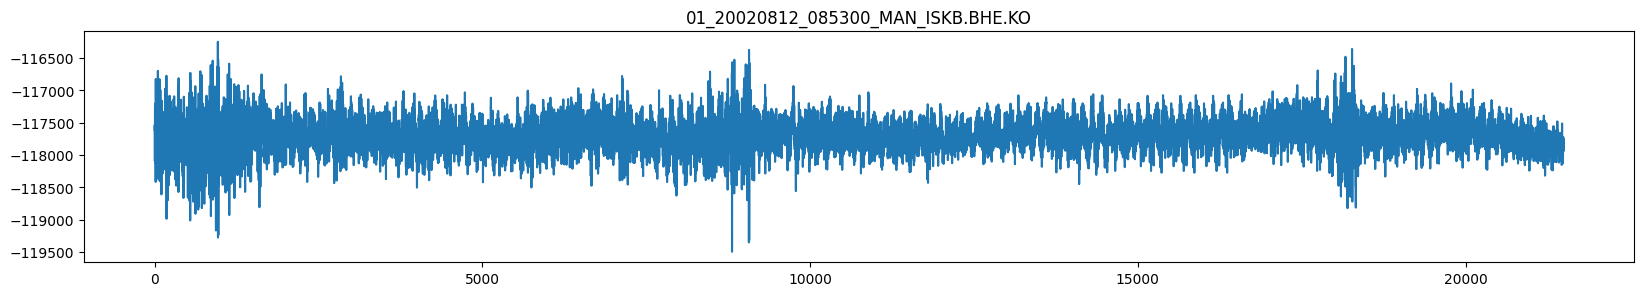

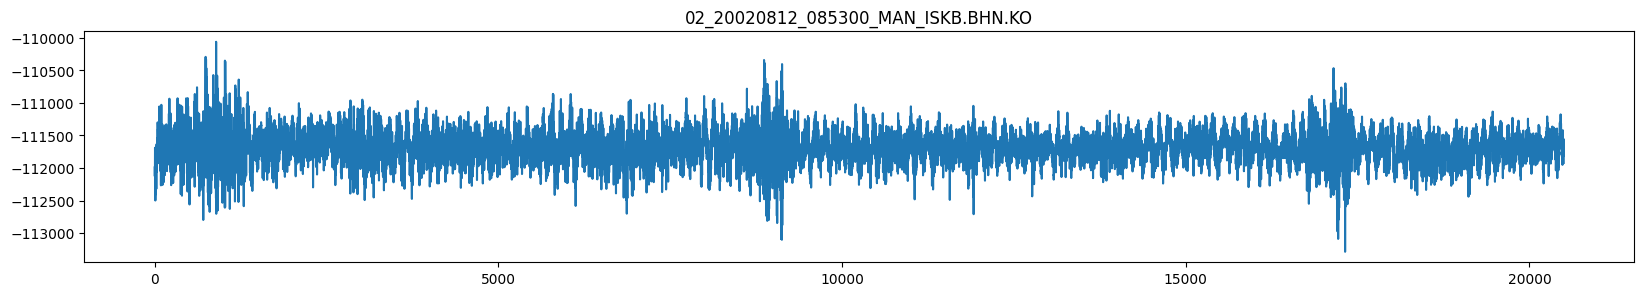

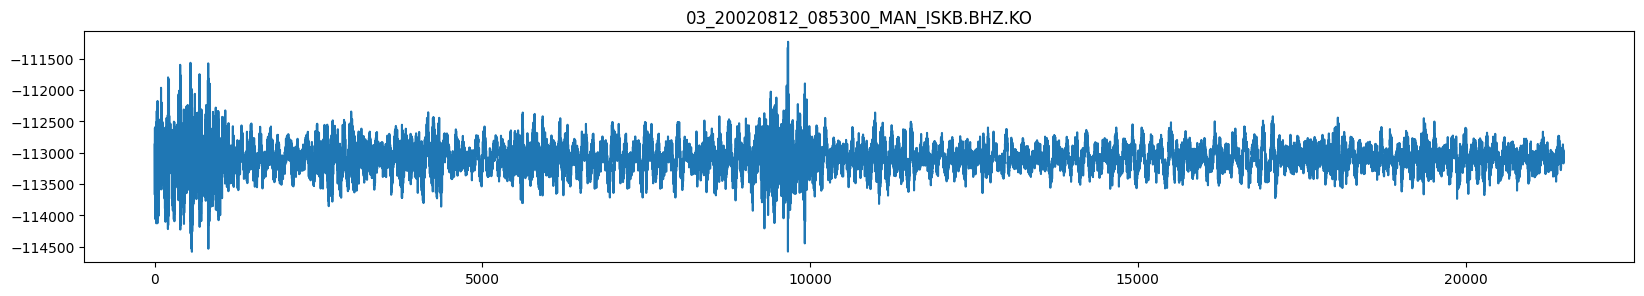

In [ ]:
# Let's plot a random earthquake data with 3 channels
random_folder = random.choice(os.listdir('/content/drive/MyDrive/eartquakes_records/2002_ordered'))
print('Random Earthquake:', random_folder, '\n')

for i in os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002_ordered/{random_folder}'):
  plt.figure(figsize=(20, 3))
  st = obspy.read(f'/content/drive/MyDrive/eartquakes_records/2002_ordered/{random_folder}/{i}')
  plt.plot(st[0].data)
  plt.title(i)
  plt.show()

## Move incorrect wavefrom from main directory

After deep diving the records, I have discovered there are lots of incorrect records to delete them, I created a txt file and put the name of the incorrect records name. Now, lets move them into `incorrect_records` directory.

In [ ]:
# Get the text file path
text_path = '/content/drive/MyDrive/eartquakes_records/incorrect_erthquake_records.txt'

# Create an empty list for incorect records name
incorrect_records = []

# Read the txt file and append the names into our empty list
with open(text_path) as f:
  for line in f:
    incorrect_records.append(line.strip())

In [ ]:
# Check out the first 10 incorrect records
incorrect_records[:10]

['20020509_151900_CTTX',
 '20020509_151900_EDRB',
 '20020509_151900_ISKB',
 '20020509_151900_VANB',
 '20020511_094000_MRMX',
 '20020518_164300_CTTX',
 '20020518_164300_MFTX',
 '20020518_164300_MRMX',
 '20020518_164300_VANB',
 '20020518_164300_YLVX']

In [ ]:
# How many incorrect records we have?
len(incorrect_records)

322

In [ ]:
# Move the incorrect records into another directory
for i in incorrect_records:
  if i in os.listdir('/content/drive/MyDrive/eartquakes_records/2002_ordered'):
    # Define record and destination path
    record_path = f'/content/drive/MyDrive/eartquakes_records/2002_ordered/{i}'
    destination_path = f"/content/drive/MyDrive/eartquakes_records/incorrect_records/{i}"
    # Copy the directories
    shutil.move(record_path, destination_path)

In [ ]:
# Check the incorrect records length. Should be 322
len(os.listdir('/content/drive/MyDrive/eartquakes_records/incorrect_records'))

322

## Get the earthqauke catalog and match it with waveforms

We have ordered our waveforms and removed some incorrect waveforms until now. However to get more information about the these waveforms such as magnitude, latitude, longitude, location, etc. we need to earthquake catalog. Let's match them.

The earthquake catalog belongs to 2012 was downloaded from: http://www.koeri.boun.edu.tr/sismo/zeqdb/

### Get the earhquake information from the waveforms

Let's get the all informations from our waveforms such as start time, end time, network, station, sampling rate, etc.

In [ ]:
# Lets check out the single data
st = obspy.read('/content/drive/MyDrive/eartquakes_records/2002_ordered/20020501_104500_YLVX/01_20020501_104500_MAN_YLVX.BHE.KO')
st[0].stats

         network: KO
         station: YLVX
        location: 
         channel: BHE
       starttime: 2002-05-01T10:45:00.004000Z
         endtime: 2002-05-01T10:49:59.974000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 29998
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.01, 'b': 0.0, 'e': 299.97998, 'o': -0.004400015, 'a': 138.88, 'internal0': 2.0, 't0': 7.38, 't9': 0.0, 'f': 220.9, 'stla': 40.5667, 'stlo': 29.3728, 'stel': 829.0, 'evla': 38.457, 'evlo': 30.84417, 'evdp': 8.1, 'dist': 266.22025, 'az': 332.08362, 'baz': 151.1511, 'gcarc': 2.3946428, 'cmpaz': 90.0, 'cmpinc': 90.0, 'nzyear': 2002, 'nzjday': 121, 'nzhour': 10, 'nzmin': 45, 'nzsec': 0, 'nzmsec': 4, 'nvhdr': 6, 'npts': 29998, 'iftype': 1, 'idep': 5, 'iztype': 9, 'unused21': 3, 'unused22': 0, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 1, 'unused23': 1, 'kstnm': 'YLVX', 'ko': 'origin', 'ka': 'EP-33', 'kt0': 'S', 'kf': 'D', 'kcmpnm': 'BHE', 'knetwk': 'KO'})

In [ ]:
# Create lists for info
network = []
station = []
channel = []
start_time = []
end_time = []
sampling_rate = []
npts = [] # number of points (total points)

In [ ]:
# Get the all info from data
for i in sorted(os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002_ordered')):
  # Define the file name and path
  file_name = sorted(os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002_ordered/{i}'))[0]
  file_path = f'/content/drive/MyDrive/eartquakes_records/2002_ordered/{i}/{file_name}'
  # Read the data
  st = obspy.read(file_path)[0]
  # Append the all data into empty list
  network.append(st.stats.network)
  station.append(st.stats.station)
  channel.append(st.stats.channel)
  start_time.append(st.stats.starttime)
  end_time.append(st.stats.endtime)
  sampling_rate.append(st.stats.sampling_rate)
  npts.append(st.stats.npts)

In [ ]:
# Create dataframe
df = pd.DataFrame({
    'network': network,
    'station': station,
    'channel': channel,
    'start-time': start_time,
    'end-time': end_time,
    'sampling-rate': sampling_rate,
    'npts': npts
})

In [ ]:
# Check the first 5 rows
df.head()

,network,station,channel,start-time,end-time,sampling-rate,npts
0,KO,YLVX,BHE,2002-05-01T10:45:00.004000Z,2002-05-01T10:49:59.974000Z,100.0,29998
1,KO,YLVX,BHE,2002-05-04T23:26:00.004000Z,2002-05-04T23:35:59.974000Z,100.0,59998
2,KO,BALB,BHE,2002-05-05T09:21:00.000000Z,2002-05-05T09:31:07.980000Z,50.0,30400
3,KO,CTTX,BHE,2002-05-05T09:21:00.004000Z,2002-05-05T09:30:59.964000Z,100.0,59997
4,KO,ISKB,BHE,2002-05-05T09:20:54.000000Z,2002-05-05T09:31:01.980000Z,50.0,30400


In [ ]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   network        1487 non-null   object 
 1   station        1487 non-null   object 
 2   channel        1487 non-null   object 
 3   start-time     1487 non-null   object 
 4   end-time       1487 non-null   object 
 5   sampling-rate  1487 non-null   float64
 6   npts           1487 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 81.4+ KB


In [ ]:
# Let's import dataframe
df.to_csv('/content/drive/MyDrive/eartquakes_records/waveworm_data.csv')

Now, I have completed the this part. In summary, I have gathered all data from complex directory file system and make them ordered and saved in a new folder. Then, deleted some of incorrect data and created a dataframe that include waveform information. On the second notebook, I will work on earthquake catalog and match with our waveform dataframe. By this way, I will gather all necessary data and start to work data preprocessing.